In [64]:
import numpy as np
import pandas as pd
titanic = pd.read_csv('titanic_data.csv')

In [65]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [66]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [122]:
titanic_missing_age_removed = titanic.dropna(subset=['Age'])

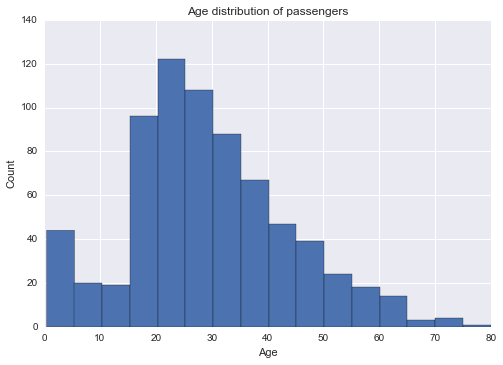

In [68]:
titanic['Age'].hist(bins=16)
plt.title("Age distribution of passengers")
plt.ylabel("Count")
plt.xlabel("Age")

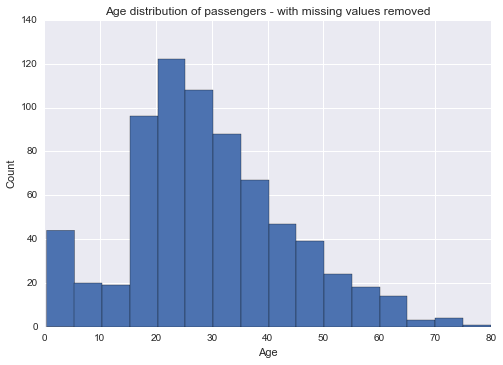

In [69]:
titanic_missing_age_removed['Age'].hist(bins=16)
plt.title("Age distribution of passengers - with missing values removed")
plt.ylabel("Count")
plt.xlabel("Age")

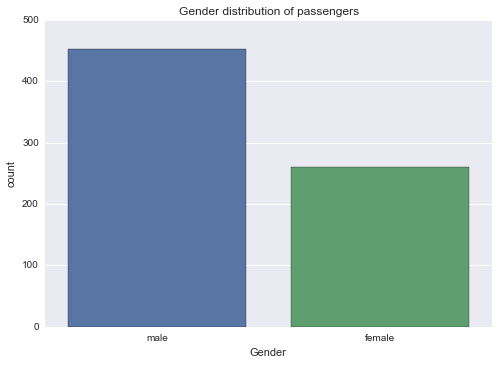

In [70]:
sns.countplot(x='Sex', data=titanic_missing_age_removed)
plt.title("Gender distribution of passengers")
plt.xlabel("Gender")

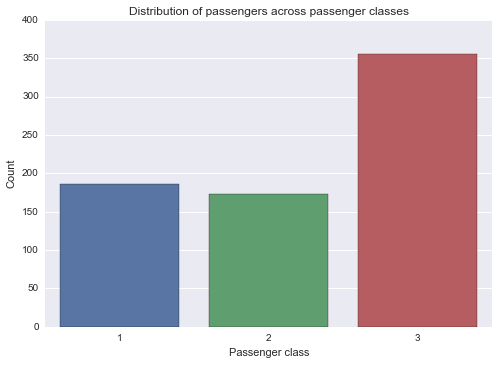

In [71]:
sns.countplot(x='Pclass', data=titanic_missing_age_removed)
plt.title("Distribution of passengers across passenger classes")
plt.ylabel("Count")
plt.xlabel("Passenger class")

In [72]:
titanic_missing_age_removed.groupby('Sex')[['Survived']].mean()


,Survived
Sex,
female,0.754789
male,0.205298


In [99]:
t_sex = titanic_missing_age_removed.groupby('Sex')[['Survived']].mean()
t_sex.rename(columns={'Survived': 'Survival rate'}, inplace=True)
t_sex.to_csv('sex.csv')

In [126]:
t_age = titanic_missing_age_removed.groupby('Age')[['Survived']].mean()
t_age.rename(columns={'Survived': 'Survival rate'}, inplace=True)
t_age.to_csv('age.csv')
t_age

,Survival rate
Age,
0,1
1,1
1,1
1,1
1,1
1,1
2,0
3,1
4,1


In [103]:
t_pclass = titanic_missing_age_removed.groupby('Pclass')[['Survived']].mean()
t_pclass.index.names = ['Passenger class']
t_pclass.rename(columns={'Survived': 'Survival rate'}, inplace=True)
t_pclass.to_csv('pclass.csv')
t_pclass

,Survival rate
Passenger class,
1,0.655914
2,0.479769
3,0.239437


In [77]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89']
titanic_missing_age_removed['age_group'] = pd.cut(titanic_missing_age_removed.Age, range(0, 100, 10), right=False, labels=labels)


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [104]:
t_agegroup = titanic_missing_age_removed.groupby('age_group')[['Survived']].mean()
t_agegroup.index.names = ['Age group']
t_agegroup.rename(columns={'Survived': 'Survival rate'}, inplace=True)
t_agegroup.to_csv('agegroup.csv')
t_agegroup

,Survival rate
Age group,
0-9,0.612903
10-19,0.401961
20-29,0.350000
30-39,0.437126
40-49,0.382022
50-59,0.416667
60-69,0.315789
70-79,0.000000
80-89,1.000000


In [107]:
t_agegroup_sex = titanic_missing_age_removed.groupby(['Sex','age_group'])[['Survived']].mean()
t_agegroup_sex.fillna(0, inplace=True)
t_agegroup_sex.index.names = ['Sex','Age group']
t_agegroup_sex.rename(columns={'Survived': 'Survival rate'}, inplace=True)
t_agegroup_sex.to_csv('agegroup_sex.csv')
t_agegroup_sex

Survival rate
Sex    Age group               
female 0-9             0.633333
       10-19           0.755556
       20-29           0.722222
       30-39           0.833333
       40-49           0.687500
       50-59           0.888889
       60-69           1.000000
       70-79           0.000000
       80-89           0.000000
male   0-9             0.593750
       10-19           0.122807
       20-29           0.168919
       30-39           0.214953
       40-49           0.210526
       50-59           0.133333
       60-69           0.133333
       70-79           0.000000
       80-89           1.000000

In [108]:
t_sex_pclass = titanic_missing_age_removed.groupby(['Sex','Pclass'])[['Survived']].mean()
t_sex_pclass.index.names = ['Sex','Passenger class']
t_sex_pclass.rename(columns={'Survived': 'Survival rate'}, inplace=True)
t_sex_pclass.to_csv('t_sex_pclass.csv')
t_sex_pclass

Survival rate
Sex    Passenger class               
female 1                     0.964706
       2                     0.918919
       3                     0.460784
male   1                     0.396040
       2                     0.151515
       3                     0.150198

In [109]:
t_sex_pclass_agegroup = titanic_missing_age_removed.groupby(['Sex','Pclass','age_group','Survived'])[['PassengerId']].count()
t_sex_pclass_agegroup.fillna(0, inplace=True)
t_sex_pclass_agegroup.astype(int)
t_sex_pclass_agegroup.index.names = ['Sex','Passenger class','Age group', 'Survived']
t_sex_pclass_agegroup.rename(columns={'PassengerId': 'Number of passengers'}, inplace=True)
t_sex_pclass_agegroup.to_csv('t_sex_pclass_agegroup.csv')
t_sex_pclass_agegroup

Number of passengers
Sex    Passenger class Age group Survived                      
female 1               0-9       0                            1
                                 1                            0
                       10-19     0                            0
                                 1                           13
                       20-29     0                            1
                                 1                           15
                       30-39     0                            0
                                 1                           27
                       40-49     0                            0
                                 1                           13
                       50-59     0                            1
                                 1                           11
                       60-69     0                            0
                                 1                            3
                       70-79     0                            0
                                 1                            0
                       80-89     0                            0
                                 1                            0
       2               0-9       0                            0
                                 1                            8
                       10-19     0                            0
                                 1                            8
                       20-29     0                            3
                                 1                           22
                       30-39     0                            1
                                 1                           16
                       40-49     0                            1
                                 1                            9
                       50-59     0                            1
                                 1                            5
...                                                         ...
male   2               30-39     0                           28
                                 1                            3
                       40-49     0                            7
                                 1                            1
                       50-59     0                            9
                                 1                            0
                       60-69     0                            2
                                 1                            1
                       70-79     0                            1
                                 1                            0
                       80-89     0                            0
                                 1                            0
       3               0-9       0                           13
                                 1                            8
                       10-19     0                           38
                                 1                            4
                       20-29     0                           86
                                 1                           16
                       30-39     0                           45
                                 1                            8
                       40-49     0                           23
                                 1                            2
                       50-59     0                            6
                                 1                            0
                       60-69     0                            2
                                 1                            0
                       70-79     0                            2
                                 1                            0
                       80-89     0                            0
                                 1                            0

[108 rows 